In [36]:
from datasets import load_dataset, DatasetDict, Audio, Features, Value

In [37]:
raw_datasets = DatasetDict()

test_metadata = "test10.csv"
# https://arrow.apache.org/docs/python/api/datatypes.html#factory-functions
features = Features({"path": Value(dtype="string", id=None), "label": Value(dtype="int64", id=None)})
stream_dataset = load_dataset("csv", data_files=test_metadata, streaming=True, split="train", features=features)

Using custom data configuration default-2e6732257563a6cc


In [38]:
raw_datasets["train"] = stream_dataset

In [39]:
raw_datasets["train"] = raw_datasets["train"].with_format("torch")

In [40]:
import torch

assert isinstance(raw_datasets["train"], torch.utils.data.IterableDataset)
dataloader = torch.utils.data.DataLoader(raw_datasets["train"], batch_size=4)
next(iter(dataloader))

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


{'path': ['/data/tone_speech_cutwav/kaldi_cutwavs_new_2020/test/cutwav_word_dataset002_cutok_tones/1/ds002__line-03887__ind-015__len-0.2__gop-097__rr-100__pin-dan__tone-1----dān.wav',
  '/data/tone_speech_cutwav/kaldi_cutwavs_new_2020/test/cutwav_word_dataset006_cutok_tones/4/ds006__line-103934__ind-011__len-0.24__gop-100__rr-100__pin-yi__tone-4----yì.wav',
  '/data/tone_speech_cutwav/kaldi_cutwavs_new_2020/test/cutwav_word_dataset006_cutok_tones/3/ds006__line-63038__ind-017__len-0.2__gop-060__rr-100__pin-zhu__tone-3----zhǔ.wav',
  '/data/tone_speech_cutwav/kaldi_cutwavs_new_2020/test/cutwav_word_dataset001_cutok_tones/3/ds001__line-17449__ind-008__len-0.52__gop-100__rr-100__pin-you__tone-3----yǒu.wav'],
 'label': tensor([0, 3, 2, 2])}

In [41]:
list(raw_datasets["train"].take(1))[0].keys()

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


dict_keys(['path', 'label'])

In [42]:
raw_datasets.items()

dict_items([('train', <datasets.formatting.dataset_wrappers.torch_iterable_dataset.TorchIterableDataset object at 0x7fe964ef0760>)])

In [43]:
next(iter(stream_dataset))

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


{'path': '/data/tone_speech_cutwav/kaldi_cutwavs_new_2020/test/cutwav_word_dataset002_cutok_tones/1/ds002__line-03887__ind-015__len-0.2__gop-097__rr-100__pin-dan__tone-1----dān.wav',
 'label': 0}

In [44]:
# stream_dataset = stream_dataset.with_format("torch")

In [45]:
stream_dataset.features

{'path': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

In [46]:
stream_dataset = stream_dataset.cast_column("path", Audio(sampling_rate=16000))

In [47]:
stream_dataset.features

{'path': Audio(sampling_rate=16000, mono=True, decode=True, id=None),
 'label': Value(dtype='int64', id=None)}

In [48]:
next(iter(stream_dataset))

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


{'path': {'path': '/data/tone_speech_cutwav/kaldi_cutwavs_new_2020/test/cutwav_word_dataset002_cutok_tones/1/ds002__line-03887__ind-015__len-0.2__gop-097__rr-100__pin-dan__tone-1----dān.wav',
  'array': array([ 0.00726318,  0.00769043,  0.00289917, ..., -0.05279541,
         -0.07974243, -0.08511353], dtype=float32),
  'sampling_rate': 16000},
 'label': 0}

In [49]:
from transformers import AutoTokenizer, AutoProcessor
tokenizer = AutoTokenizer.from_pretrained("wav2vec2-base-bert-uncased")
processor = AutoProcessor.from_pretrained("wav2vec2-base-bert-uncased")

In [50]:
def add_text_label(batch):
    text_label = batch["path"]["path"].split("__pin-")[-1].split("__")[0].lower() + "[SEP]" + str(batch["label"])
    batch["labels"] = tokenizer(text_label).input_ids
    return batch

In [51]:
updated_dataset = stream_dataset.map(add_text_label)

In [52]:
torch_dataset = updated_dataset.with_format("torch")

In [53]:
list(torch_dataset.take(1))

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


[{'path': {'path': '/data/tone_speech_cutwav/kaldi_cutwavs_new_2020/test/cutwav_word_dataset002_cutok_tones/1/ds002__line-03887__ind-015__len-0.2__gop-097__rr-100__pin-dan__tone-1----dān.wav',
   'array': array([ 0.00726318,  0.00769043,  0.00289917, ..., -0.05279541,
          -0.07974243, -0.08511353], dtype=float32),
   'sampling_rate': 16000},
  'label': 0,
  'labels': [101, 4907, 102, 1014, 102]}]

In [54]:
a = processor.feature_extractor(list(torch_dataset.take(1))[0]['path']["array"], sampling_rate=16000).get("input_values")[0]
len(a)

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


3200

In [55]:
list(torch_dataset.take(1))[0]["label"]

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


0

In [79]:
label3 = list(torch_dataset)[1]
label3 = label3["path"]["array"]
label3 = torch.from_numpy(label3).unsqueeze(0)

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


In [80]:
label2 = list(torch_dataset)[2]
label2 = label2["path"]["array"]
label2 = torch.from_numpy(label2).unsqueeze(0)

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


In [81]:
label4 = list(torch_dataset)[6]
label4 = label4["path"]["array"]
label4 = torch.from_numpy(label4).unsqueeze(0)

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


In [82]:
label1 = list(torch_dataset)[10]
label1 = label1["path"]["array"]
label1 = torch.from_numpy(label1).unsqueeze(0)

/home/vincent0730/ML_chinese_tone_classification/venv/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


In [28]:
import matplotlib.pyplot as plt
import librosa

def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)

def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [88]:
label0 = torch.from_numpy(a).unsqueeze(0)
label0.shape

torch.Size([1, 3200])

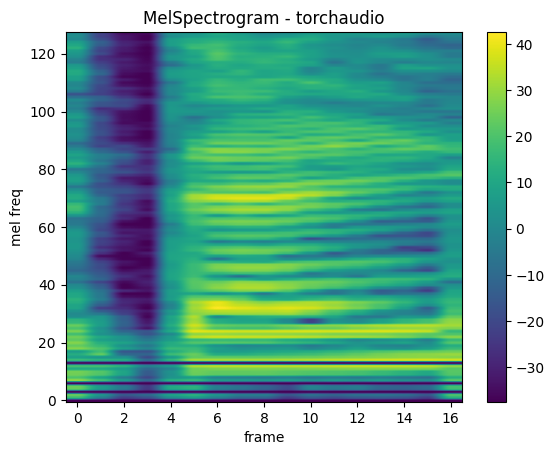

In [89]:
import torchaudio

n_fft = 400
n_mels = 128
sample_rate = 16000

mel_spec = torchaudio.transforms.MelSpectrogram(
            sample_rate,
            n_fft=n_fft,
            n_mels=n_mels)
melspec = mel_spec(label0)

plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

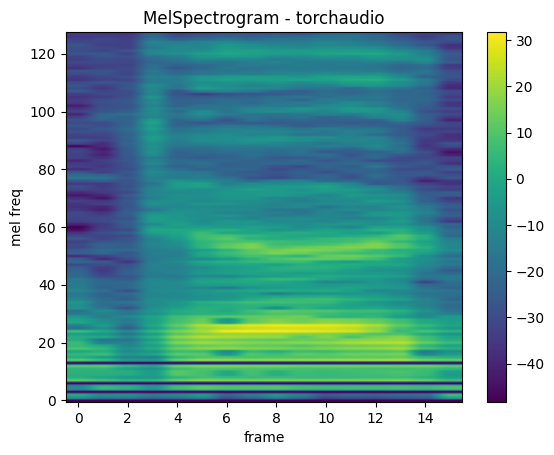

In [83]:
melspec = mel_spec(label1)

plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

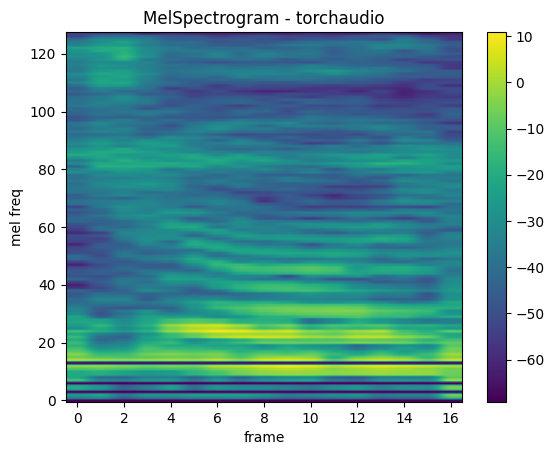

In [84]:
melspec = mel_spec(label2)

plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

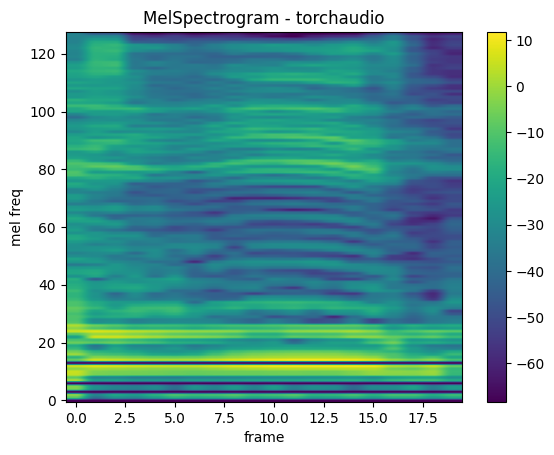

In [85]:
melspec = mel_spec(label3)

plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

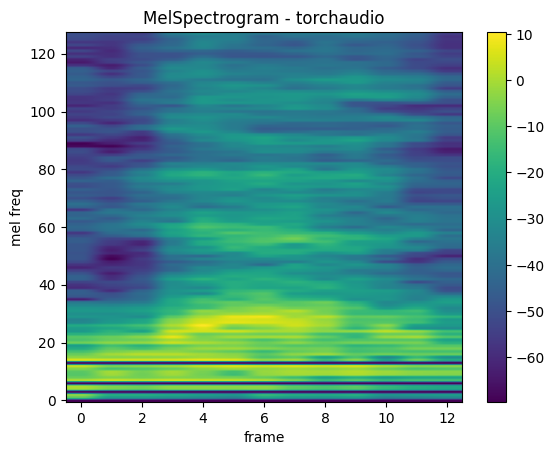

In [86]:
melspec = mel_spec(label4)

plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")